In [ ]:
!pip install top2vec
!pip install top2vec[sentence_encoders]
!pip install tensorflow tensorflow_hub tensorflow_text

In [7]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab_Notebooks_Case_Study')
import pandas as pd
# Import the wordcloud library
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from top2vec import Top2Vec
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data = pd.read_parquet("/content/drive/MyDrive/Colab_Notebooks_Case_Study/twitter_data.parquet.gzip")

In [38]:
data = data.drop(data[data["lemmatized_string"]==""].index)

In [39]:
df = data.copy()

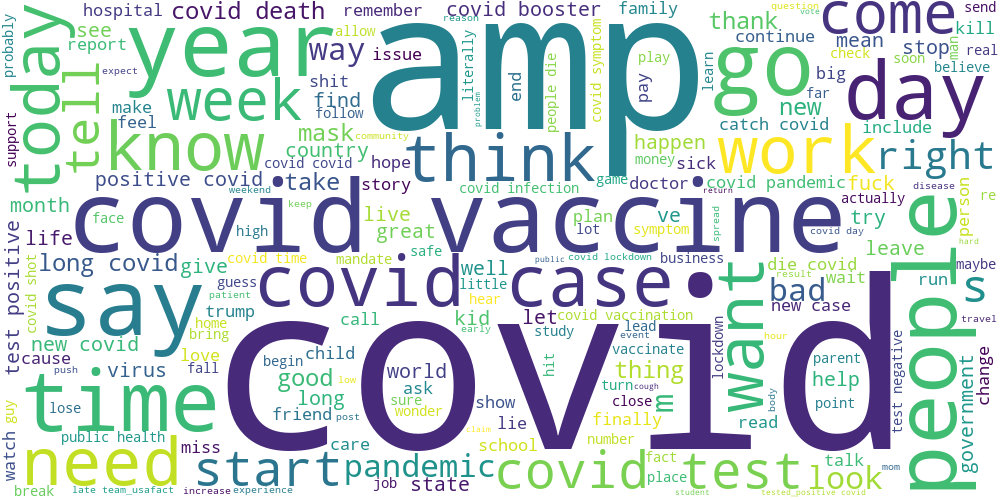

In [40]:
# Join the different processed titles together.
long_string = ','.join(list(df['lemmatized_string'].values))
# Create a WordCloud object
wordcloud = WordCloud(width = 1000, height = 500,background_color="white",  contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [41]:
def word_tokenizer(data, col):
    token=[]
    for item in data[col]:
         token.append(word_tokenize(item))

    return token

In [42]:
token = word_tokenizer(df, 'lemmatized_string')

In [45]:
model_with_universal_encoder = Top2Vec(df['lemmatized_string'].values, embedding_model='universal-sentence-encoder')

2022-09-25 12:37:01,504 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-09-25 12:37:14,790 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-09-25 12:37:27,762 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-09-25 12:38:21,434 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-09-25 12:44:09,110 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-09-25 12:44:32,662 - top2v

In [46]:
#Viewing number of topics
model_with_universal_encoder.get_num_topics()

1147

In [51]:
topic_words, word_scores, topic_scores, topic_nums = model_with_universal_encoder.search_topics(keywords=["covid"], num_topics=10)

In [54]:
topic_mapping = model_with_universal_encoder.hierarchical_topic_reduction(num_topics=10)

In [55]:
reduced_topics = model_with_universal_encoder.topic_words_reduced

In [58]:
longstring = []
i=0
while i < len(reduced_topics):
    #print(i)
    stringlong = ','.join(reduced_topics[i])
    longstring.append(stringlong)
    i=i+1

Topic number:  0


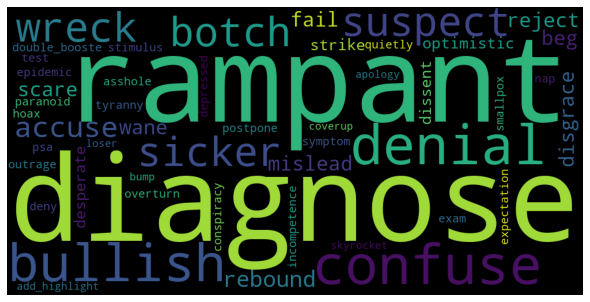

Topic number:  1


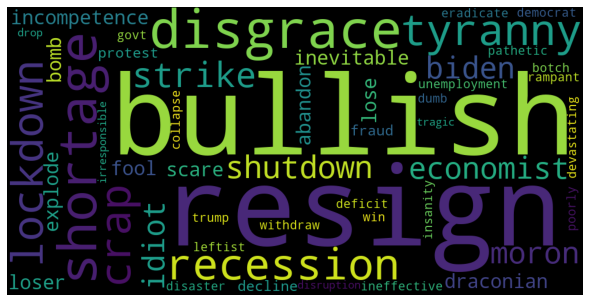

Topic number:  2


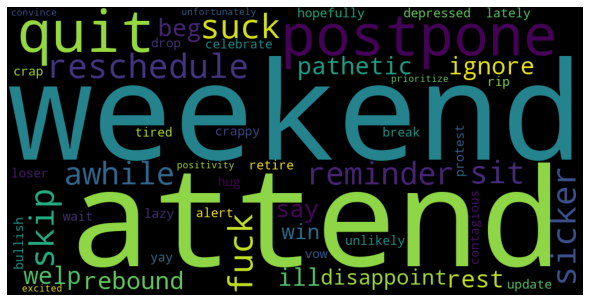

Topic number:  3


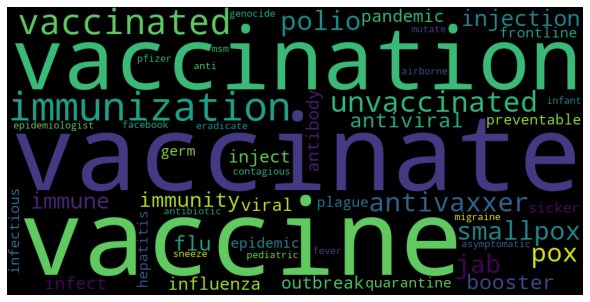

Topic number:  4


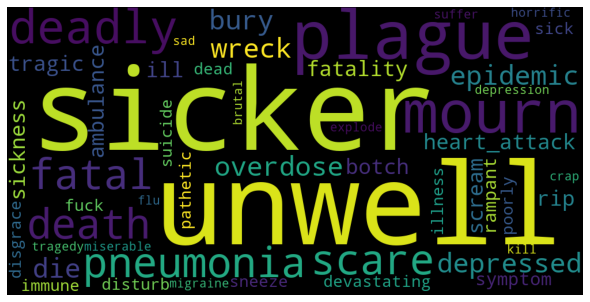

Topic number:  5


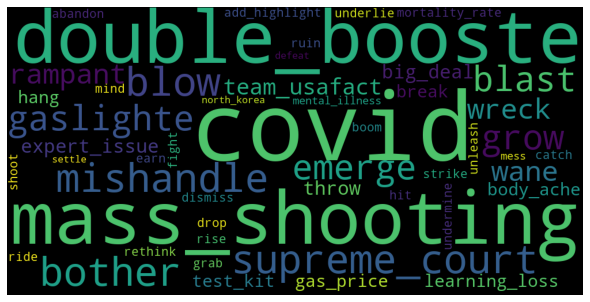

Topic number:  6


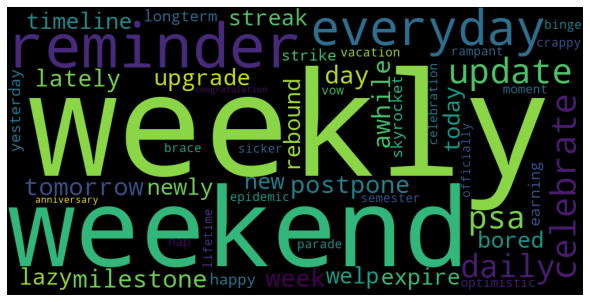

Topic number:  7


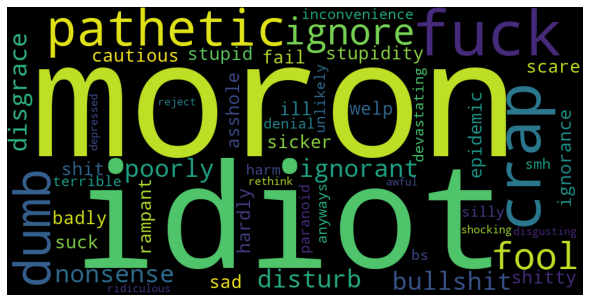

Topic number:  8


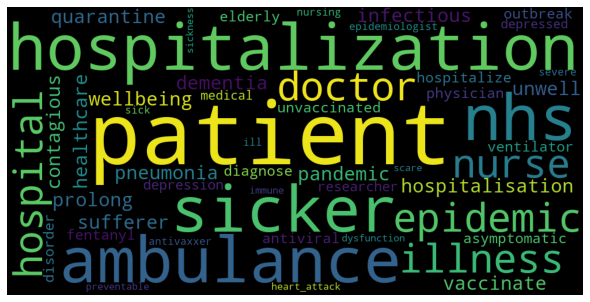

Topic number:  9


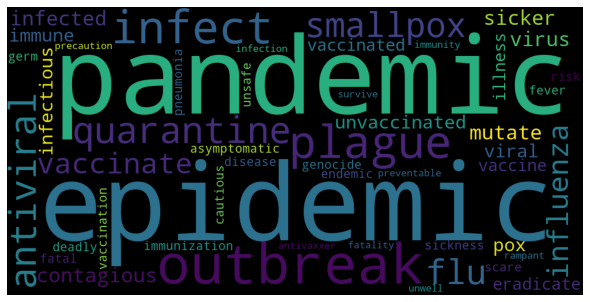

In [59]:
wordcloud = WordCloud(width = 1000, height = 500,background_color="black",  contour_width=3, contour_color='steelblue')
for num in range(0,len(longstring)):
  print("Topic number: ",num)
  wordcloud.generate(longstring[num])
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
 
  plt.show()

In [61]:
# Extract features for Topic Coherence evaluation
tokens = token
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

In [63]:
# Evaluate
coherence_model = CoherenceModel(topics=reduced_topics,
                                 #model = model_with_universal_encoder,
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='u_mass')
coherence = coherence_model.get_coherence()

In [64]:
print('\nCoherence Score: ', coherence)


Coherence Score:  -13.273877650649364
